In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
np.random.choice([1,2,3,4,5],2)  # chose 2 random number from list

array([3, 4])

In [39]:
# Data generation
m1, cov1 = [9,6],[[1,2],[2,1]] 
m2, cov2 = [6,12],[[2,-1],[-1,2]]
m3, cov3 = [3,3], [[0,.5],[.5,0.5]]

data1 = np.random.multivariate_normal(m1,cov1,250)
data2 = np.random.multivariate_normal(m2,cov2,150)
data3 = np.random.multivariate_normal(m3,cov3,100)

X = np.vstack((data1,np.vstack((data2,data3))))
np.random.shuffle(X)
X.shape


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  import sys


(500, 2)

In [40]:
def kmeans(X,k,maxIters=1000):   #k number of cluster
    m = X.shape[0]
    centroids = X[np.random.choice(np.arange(m),k)]
    
    for i in range(maxIters):
        C = []
        for x in X:
            distances = []
            for c in centroids:
                d = np.dot(x-c,x-c)
                distances.append(d)
            ci = np.argmin(distances)
            C.append(ci)
#         C = [np.argmin([np.dot(x-c,x-c) for c in centroids]) for x in X]
        
        C = np.asanyarray(C)
        centroids = [X[C == ci].mean(axis=0) for ci in range(k)]
    return np.asarray(centroids),C
        
    
    

In [41]:
centroids,C = kmeans(X,k=3)
print(centroids)
print(C.shape)

[[ 9.09388823  5.96851953]
 [ 3.29670323  3.08929141]
 [ 6.05555014 11.95825189]]
(500,)


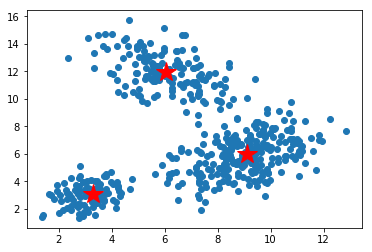

In [42]:
plt.scatter(X[:,0],X[:,-1])
plt.plot(centroids[:,0],centroids[:,-1],'r*',markersize=20)
plt.show()